In [2]:
from collections import defaultdict
from sys import getsizeof

import networkx as nx
import pandas as pd
# autoimport
%load_ext autoreload
%autoreload 1

In [3]:
from src.gnn_models import *
from src.convert_graphml_to_pyg_data_multithread import *
%aimport src.gnn_models

In [4]:
PROCESSED_DATA_DIR = r"E:\gnn_data\pyg_data_v2"
dataset_unscaled = FastSTEPDataset(PROCESSED_DATA_DIR, start_index=0)
get_dataset_stats(dataset_unscaled)

Fast dataset loaded:
- Total samples: 62198
- Processed successfully: 62198
- Failed processing: 0
Label counts in dataset:
Label 1: 40094 instances
Label 0: 22104 instances
Label 1: 64.46% of total instances
Label 0: 35.54% of total instances
Class weights for loss function: [1.55130443457874, 2.8138798407528047]


In [5]:
SCALED_DATA_DIR = r"E:\gnn_data\pyg_data_v2_scaled_validation_fold_00"
dataset_scaled = PyGInMemoryDataset_v2(SCALED_DATA_DIR)

In [6]:
model = GATCombined_v2(
    input_features=dataset_scaled[0].x.shape[1],
    global_feature_dim=dataset_scaled[0].global_features.shape[1],
    edge_features=dataset_scaled[0].edge_attr.shape[1],
    hidden_sizes=[460],
    conv_dropout_rate=0.5,
    classifier_dropout_rate=0.35,
    use_layer_norm=True,
    pool_hidden_size=286
)

Created GAT model:
- Input features: 27
- Input edge features: 14
- Number of hidden layers: 1
- Hidden layer sizes: [460]
- Number of attention heads: 4
- Output classes: 2
- Convolution dropout rate: 0.5
- Classifier dropout rate: 0.35
- Pooling hidden layer size: 286
- Layer normalization: True


In [1]:
trained_model, tracker = simple_train_model_v1(
    dataset_dir=PROCESSED_DATA_DIR,
    validation_fold=0,
    gnn_model=model,
    num_epochs=200,
    batch_size=32,
    learning_rate=0.001456,
    optimizer_scheduler="OneCycleLR",
    start_index=0,
    num_graphs_to_use=63000,
    metrics_tracker=None,
    random_state=100
)

NameError: name 'simple_train_model_v4' is not defined

In [19]:
tracker["val_tracker"].best_metric()

{'acc': 0.9058333039283752,
 'auroc': 0.9363342523574829,
 'f1': 0.9058873057365417}

In [18]:
tracker["val_tracker"].compute()["auroc"]

tensor(0.9205, device='cuda:0')

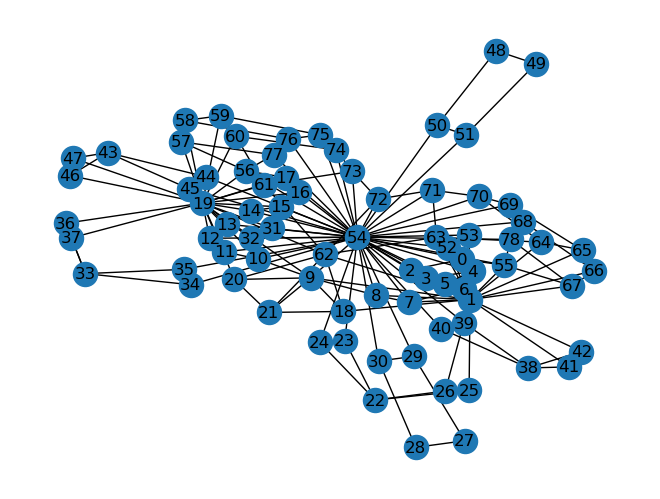

In [44]:
graph_path = r"E:\gnn_data\graphml_files\44184_23010_01_17_014_AUFNAHME_90X90.graphml"
G = nx.read_graphml(graph_path)
nx.draw(G, with_labels=True)

In [45]:
data = enhanced_convert_graph_global_features_v2(G, label=1, label_multi=1, node_type_index=None, global_features=[1,2,3])

In [14]:
failed_files = []
for file in tqdm(list(Path(PROCESSED_DATA_DIR).glob("*.pt"))):
    data = torch.load(file, weights_only=False)
    if data.edge_attr.size(1) < 1 or data.edge_attr.size(1) < 1:
        failed_files.append(file)

100%|██████████| 63091/63091 [00:18<00:00, 3351.77it/s]


In [17]:
failed_files

[WindowsPath('E:/gnn_data/pyg_data_v2/101418_bottom.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/107784_ImageToStl_com_wheel.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/108354_duwer.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/108355_rem_beugel.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/109908_BodyTop.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/109913_TiltBracketHead.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/109916_Wheel.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/111953_E4678011_Anschlagarm.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/114737_Distanzring001.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/114739_Distanzring001.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/114741_Distanzring001.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/122143_250422_EMA_Enclosure_Design_front.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/124037_250422_EMA_Enclosure_Design_front.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/124542_turbidity_gasket_tow_float.pt'),
 WindowsPath('E:/gnn_data/pyg_data_v2/124550_turbi

In [9]:
sample = torch.load('E:/gnn_data/pyg_data_v2/101418_bottom.pt', weights_only=False)
for key, value in sample:
    if 0 in value.shape:
        print(f"{key}: {value.shape}")
    else:
        print(f"{key} - This should not run")

x - This should not run
edge_index: torch.Size([2, 0])
edge_attr: torch.Size([0, 0])
y - This should not run
y_multi - This should not run
global_features - This should not run


In [2]:
import joblib
with open(r"C:\Users\phanm\OneDrive\Documents\Study\PythonProjects\manufacturing-tech-gnn\GINECombined_v2_metrics_tracker.pkl", "rb") as f:
    tracker = joblib.load(f)

In [6]:
tracker_compute = {
    "train": tracker["train_tracker"].compute_all(),
    "val": tracker["val_tracker"].compute_all(),
}

In [7]:
tracker_compute

{'train': {'acc': tensor([0.9093, 0.9138, 0.9154, 0.9142, 0.9157, 0.9151, 0.9184, 0.9176, 0.9190,
          0.9244, 0.9258, 0.9252, 0.9252, 0.9265, 0.9266, 0.9277, 0.9271, 0.9306,
          0.9314, 0.9323, 0.9315, 0.9313, 0.9319, 0.9298, 0.9323, 0.9334, 0.9342,
          0.9340, 0.9346, 0.9342, 0.9341, 0.9345, 0.9338, 0.9352, 0.9355, 0.9365,
          0.9359, 0.9361, 0.9372, 0.9353, 0.9365, 0.9371, 0.9378, 0.9378, 0.9381,
          0.9384, 0.9379, 0.9379, 0.9379, 0.9387, 0.9276, 0.9253, 0.9269, 0.9268,
          0.9273, 0.9254, 0.9261, 0.9257, 0.9252, 0.9258, 0.9256, 0.9323, 0.9329,
          0.9325, 0.9311, 0.9322, 0.9321, 0.9312, 0.9324, 0.9339, 0.9352, 0.9356,
          0.9349, 0.9353, 0.9356, 0.9351, 0.9359, 0.9371, 0.9369, 0.9364, 0.9370,
          0.9371, 0.9371, 0.9375, 0.9376, 0.9378, 0.9377, 0.9386, 0.9388, 0.9393,
          0.9390, 0.9387, 0.9387, 0.9397, 0.9393, 0.9395, 0.9396, 0.9399, 0.9404,
          0.9392, 0.9397, 0.9407, 0.9406, 0.9405, 0.9399, 0.9407, 0.9408, 0.9401,


In [36]:
fold = 0
dataset_path = Path(
    rf"E:\gnn_data\pyg_data_v2_scaled\fold_{str(fold).zfill(2)}")
# dataset_path = Path(
#     rf"E:\gnn_data\pyg_data_v2_scaled")

In [ ]:
dataset3 = PyGInMemoryDataset(
        root=str(dataset_path),
        pattern="*.pt",
        transform=None,
        pre_transform=None,
        pre_filter=None
    )

In [1]:
print("First line", end="")
print("second line")

First linesecond line
